**IP3_JRH**

##### Author: Jack Huff
##### Semester: Spring 2022
##### Version: 1.0

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

In [4]:
df = pd.read_csv("50Hertz.csv")
df = pd.read_csv("Amprion.csv")
df = pd.read_csv("TenneTTSO.csv")
df = pd.read_csv("TransnetBW.csv")
# Importing Data

In [5]:
df.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,1.44,1.38,1.38,1.50,1.77,1.87,1.95,2.47,2.68,...,21.99,18.33,18.56,18.56,17.11,14.19,15.69,16.71,18.88,21.67
1,24/08/2019,22.43,22.25,22.03,23.34,24.81,22.90,22.77,19.49,22.58,...,1.67,1.35,1.34,0.97,1.41,1.50,1.30,1.23,1.15,1.01
2,25/08/2019,0.75,1.06,0.72,1.00,0.80,0.95,0.66,0.84,0.84,...,1.96,1.61,1.39,0.93,0.60,0.41,0.56,0.36,0.23,0.19
3,26/08/2019,0.56,0.85,0.56,0.40,0.46,0.39,0.34,0.19,0.28,...,5.10,5.25,5.47,4.10,4.89,4.27,3.16,2.75,1.66,1.39
4,27/08/2019,1.08,1.02,0.98,0.84,0.57,0.46,0.28,0.15,0.12,...,11.25,11.60,11.66,12.43,11.17,9.35,11.21,13.26,12.63,13.20


In [6]:
df.sample()


,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
256,05/05/2020,7.44,7.44,8.29,6.57,8.0,8.78,7.78,6.67,6.4,...,32.67,33.0,33.5,33.0,34.0,32.33,30.44,31.5,31.33,30.0


### 1.1 a and b
writing a function that converts date to datetime format and also creates a column with the correct name for each company. We ran the function 4 times. 
loc= 0 makes it the first column. 
pd.to_datetime converts the date column to datetime format. 

In [7]:
def convert_function(x):
    df = pd.read_csv(x)
    df.Date = pd.to_datetime(df.Date)
    df.insert(loc=0, column= 'Company', value = (x[:-4]))
    return(df)

In [8]:
Hertz = convert_function("50Hertz.csv")
Amprion = convert_function("Amprion.csv")
Tenne = convert_function("TenneTTSO.csv")
Trans = convert_function("TransnetBW.csv")

### 1.2 and 1.3.  Putting data frames together
Here, we used the concat funciton to merge the data frames into one new data frame. 

In [9]:
fulldf = pd.concat([Hertz, Amprion, Tenne, Trans])

In [10]:
fulldf.head()

,Company,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,50Hertz,2019-08-23,74.0,73.0,63.0,55.0,54.0,53.0,51.0,52.0,...,68.0,68.0,63.0,61.0,57.0,52.0,51.0,49.0,45.0,40.0
1,50Hertz,2019-08-24,37.0,38.0,35.0,35.0,31.0,32.0,30.0,29.0,...,118.0,118.0,112.0,107.0,104.0,104.0,99.0,95.0,95.0,96.0
2,50Hertz,2019-08-25,93.0,88.0,85.0,81.0,76.0,80.0,81.0,76.0,...,111.0,108.0,103.0,96.0,93.0,88.0,86.0,82.0,80.0,77.0
3,50Hertz,2019-08-26,72.0,66.0,59.0,54.0,48.0,46.0,45.0,43.0,...,48.0,47.0,47.0,46.0,47.0,49.0,50.0,51.0,48.0,42.0
4,50Hertz,2019-08-27,39.0,38.0,36.0,36.0,34.0,31.0,31.0,30.0,...,54.0,53.0,51.0,52.0,51.0,52.0,54.0,54.0,56.0,59.0


### 1.4.
Made a data set that is sorted by year and mean values

In [11]:
sorteddf = fulldf.groupby([fulldf.Company, fulldf.Date.dt.year]).mean()

In [12]:
sorteddf.head()

00:00:00    00:15:00    00:30:00    00:45:00    01:00:00  \
Company   Date                                                               
50Hertz   2019  143.320611  142.351145  142.366412  142.000000  141.900763   
          2020  141.894737  141.124060  140.936090  140.838346  140.281955   
Amprion   2019  106.992366  106.679389  106.091603  105.549618  108.083969   
          2020   93.751880   94.312030   94.424812   94.033835   93.657895   
TenneTTSO 2019  150.866183  150.450992  150.152901  149.611679  148.946412   

                  01:15:00    01:30:00    01:45:00    02:00:00    02:15:00  \
Company   Date                                                               
50Hertz   2019  141.381679  140.648855  140.923664  140.732824  140.458015   
          2020  140.037594  139.462406  139.112782  138.646617  138.560150   
Amprion   2019  108.282443  108.129771  107.465649  107.282443  106.671756   
          2020   93.563910   93.146617   92.812030   92.571429   92.127820   
TenneTTSO 2019  148.629847  148.808473  148.620382  148.236031  147.931298   

                ...    21:30:00    21:45:00    22:00:00    22:15:00  \
Company   Date  ...                                                   
50Hertz   2019  ...  144.328244  144.839695  144.709924  144.641221   
          2020  ...  147.590226  147.214286  147.075188  146.661654   
Amprion   2019  ...  115.412214  114.572519  114.076336  112.961832   
          2020  ...   96.515038   96.338346   96.368421   96.379699   
TenneTTSO 2019  ...  152.761908  152.608015  152.675802  152.765115   

                  22:30:00    22:45:00    23:00:00    23:15:00    23:30:00  \
Company   Date                                                               
50Hertz   2019  144.442748  144.274809  144.954198  144.206107  144.076336   
          2020  145.609023  144.624060  143.864662  143.680451  143.112782   
Amprion   2019  112.595420  112.427481  111.343511  110.946565  110.328244   
          2020   96.176692   94.898496   95.018797   94.973684   94.691729   
TenneTTSO 2019  152.631374  152.897176  152.363740  152.357405  152.236565   

                  23:45:00  
Company   Date              
50Hertz   2019  144.259542  
          2020  142.338346  
Amprion   2019  107.473282  
          2020   94.383459  
TenneTTSO 2019  151.705496  

[5 rows x 96 columns]

### 1.5 Visualizing the data

creating data frames for midnight and noon 

In [13]:
midnight = sorteddf["00:00:00"]
noon = sorteddf["12:00:00"]

Checking to make sure that the dataframes work and match the series shown

In [14]:
midnight

Company     Date
50Hertz     2019    143.320611
            2020    141.894737
Amprion     2019    106.992366
            2020     93.751880
TenneTTSO   2019    150.866183
            2020    141.603835
TransnetBW  2019     39.293740
            2020     30.899023
Name: 00:00:00, dtype: float64

In [15]:
noon

Company     Date
50Hertz     2019    142.473282
            2020    163.398496
Amprion     2019    100.572519
            2020    101.357143
TenneTTSO   2019    149.229466
            2020    162.944436
TransnetBW  2019     37.772366
            2020     25.731053
Name: 12:00:00, dtype: float64

**Plotting the bar charts**

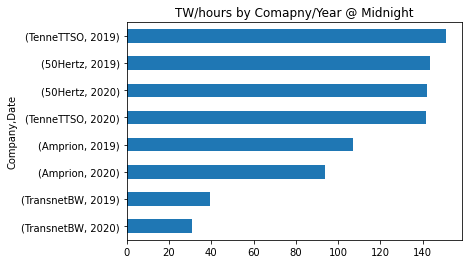

In [16]:
midnight.sort_values().plot(kind='barh')
plt.title("TW/hours by Comapny/Year @ Midnight")
plt.savefig('midnightbar.png')

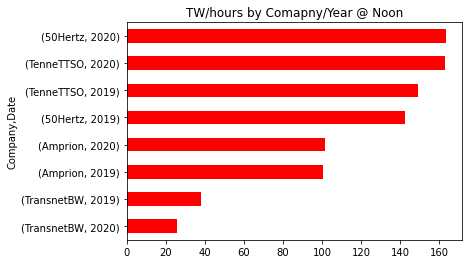

In [17]:
noon.sort_values().plot(kind='barh', color='red')
plt.title("TW/hours by Comapny/Year @ Noon")
plt.savefig('noonbar.png')

### 1.6 Combining the two charts
stacked the plots on top of each other, colored them, and made sure they shared the same x axis. 

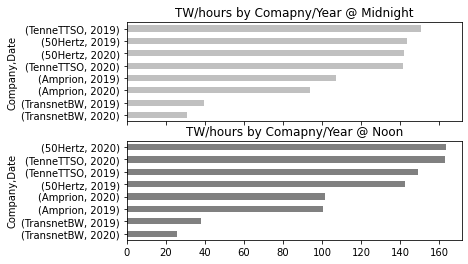

In [18]:
combined_bar_charts, (ax_midnight, ax_noon) = plt.subplots(2,1, sharex=True)
midnight.sort_values().plot(kind='barh', ax=ax_midnight, color='silver', title= 'TW/hours by Comapny/Year @ Midnight')
noon.sort_values().plot(kind='barh', ax=ax_noon, color='gray', title= 'TW/hours by Comapny/Year @ Noon')
plt.savefig('combined_bar_chart.png')

### 1.7 
creating a function that accepts unground dataframes

In [19]:
def daily_view(dataframe, company, date, color= 'purple'):
    df = dataframe.query (f'Company== "{company}" and Date == "{date}"').drop(columns = ["Company", "Date"]).melt()
                       
    fig = df.plot(kind='area', color= f'{color}', x='variable', y='value',title = f'Power Production: {company}/{date}',figsize= (8,4))
    fig.set_xlabel('Time of Day')
    fig.set_ylabel('TW/h Generated')
                    

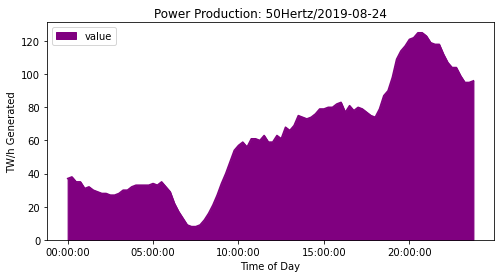

In [20]:
daily_view(fulldf, '50Hertz', '2019-08-24', 'purple')


### Part 2

#### 1. Generating a line chart

In [21]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [22]:
exercise = sns.load_dataset('exercise')

In [23]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [24]:
exercise.sample()

,Unnamed: 0,id,diet,pulse,time,kind
71,71,24,low fat,120,30 min,running


Text(0, 0.5, 'ID')

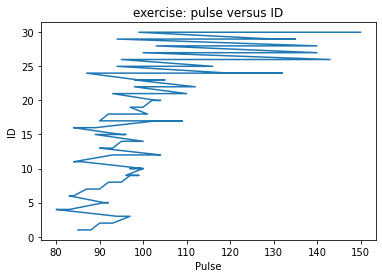

In [25]:
plt.figure
plt.plot(exercise.pulse, exercise.id)
plt.title("exercise: pulse versus ID")
plt.xlabel("Pulse")
plt.ylabel("ID")

### 2. Box and Whisker Plot

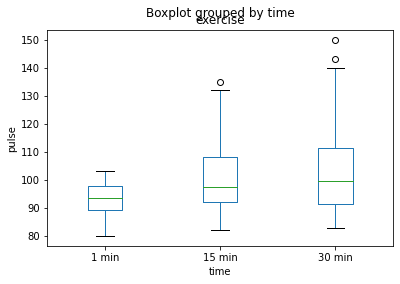

In [26]:
ax1 = exercise.boxplot(column = 'pulse', by ='time')
ax1.set_title('exercise')
ax1.set_ylabel('pulse')
ax1.set_xlabel('time')
ax1.grid(False)

### 3. Histogram and Kernel Density

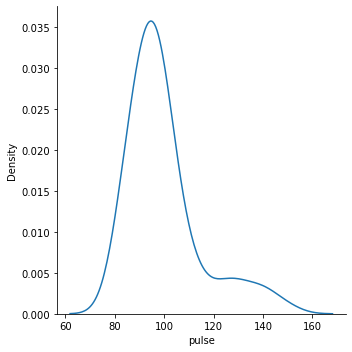

In [27]:
sns.displot(exercise.pulse, kind='kde')

(array([30.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0., 30.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

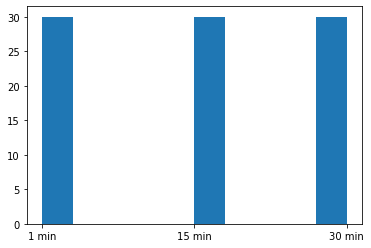

In [48]:
plt.hist(exercise.time, bins=10)


### 4. Heatmap

<AxesSubplot:>

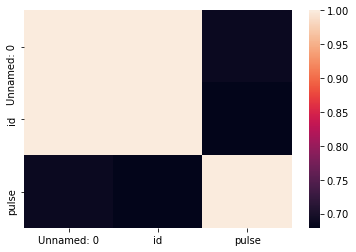

In [49]:
sns.heatmap(exercise.corr())

### 5. Seaborn Pair Plot

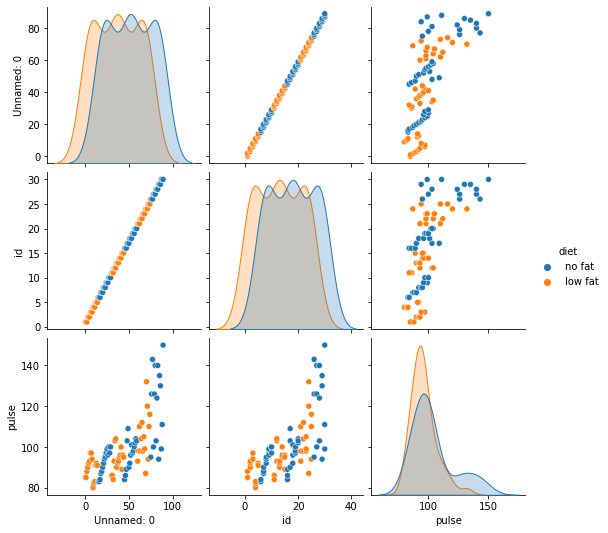

In [46]:
sns.pairplot(exercise, hue = 'diet')